In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deeja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load the dataset
dataset = pd.read_csv('emails.csv')
print("Dataset shape:", dataset.shape)
print(dataset.head())
dataset.info()
print(dataset.describe())

Dataset shape: (5728, 2)
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB
              spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


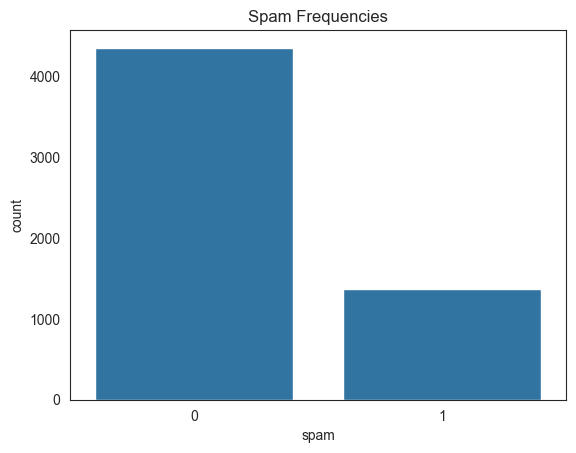

In [3]:
# Visualize spam frequencies
plt.figure(dpi=100)
sns.countplot(x=dataset['spam'])
plt.title("Spam Frequencies")
plt.show()

In [4]:
# Check for missing data in each column
print("Missing data in each column:\n", dataset.isnull().sum())

Missing data in each column:
 text    0
spam    0
dtype: int64


In [5]:
# Remove duplicates if any
dataset.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", dataset.shape)

Shape after dropping duplicates: (5695, 2)


In [6]:
# Function to clean text: remove punctuation, filter out stopwords, and tokenize
def process(text):
    # Remove punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    # Tokenize and remove stopwords
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [7]:
# Create and fit the CountVectorizer on the email text using the custom analyzer
vectorizer = CountVectorizer(analyzer=process)
message = vectorizer.fit_transform(dataset['text'])

In [9]:
# Save the vectorizer object (do not save the transformed sparse matrix)
dump(vectorizer, open("vectorizer.pkl", "wb"))
print("Vectorizer saved successfully.")

Vectorizer saved successfully.


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(message, dataset['spam'], test_size=0.20, random_state=0)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4556, 37229)
Testing set shape: (1139, 37229)


In [11]:
# Build and train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


In [12]:
dump(model, open("model.pkl", 'wb'))
print("Model saved successfully.")

Model saved successfully.


In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model: Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 99.21%


In [15]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139



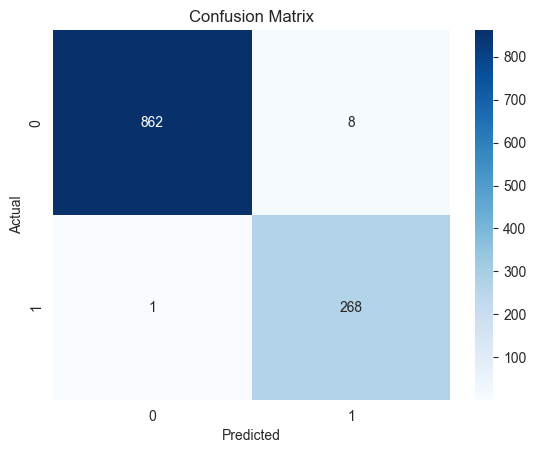

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()